# The classic

## Below is some standard Data Science dataset exploration and machine learning. The goal of this project is to run through a well explored dataset and utilize the different tools and algorithms one has. 

### Additionally we should be able to communicate the process and results clearly to any who would be viewing this.

1. Data and Setup
2. EDA
3. Data Transformation and Engineering
4. Algorithms
    a. Baseline
    b. SVM
    c. Linear
    d. Gradient Descent
    e. Logistic
5. Optimization
6. Results
    
For this example we will be looking at the Iris Dataset which has been done by everyone.

# 1. Data and Setup

In [2]:
#As per usual import the classic libraries and the iris dataset as iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Let's take a look at this dataset more closely...

One of the most important things to do when looking at new data is to undertasnd the data itself.
Usually this would include evrything from what is included in the data to the validaty of the survey / data collection.

Luckily when using one of the classic datasets most of this infromation is readily available.

For the iris dataset we can see that our targets are three different types of flowers. This quickly points us to our classification algorithms and is something we should keep in mind as we continue through the excercise. Our features are 2 attributes of most flowers. The petal is obvious but the sepal is a green leaf that is under the petals and typically encloses it.

In [3]:
print("Keys:" , iris_dataset.keys()) 
print('-' * 100)
print('Targets:', iris_dataset['target_names'])
print('-' * 100)
print('Features:', iris_dataset['feature_names'])
print('-' * 100)
print('Size:', iris_dataset['data'].shape)
print('-' * 100)

Keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
----------------------------------------------------------------------------------------------------
Targets: ['setosa' 'versicolor' 'virginica']
----------------------------------------------------------------------------------------------------
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
----------------------------------------------------------------------------------------------------
Size: (150, 4)
----------------------------------------------------------------------------------------------------


In [4]:
iris = pd.DataFrame(data = iris_dataset['data'],
                   columns = iris_dataset['feature_names'])
iris['target'] = iris_dataset['target']

In [5]:
def fix_target(x):
    if x == 0:
        x = iris_dataset['target_names'][0]
    if x == 1:
        x = iris_dataset['target_names'][1]
    if x == 2:
        x = iris_dataset['target_names'][2]
    return x

iris['target'] = list(map(fix_target, iris['target']))

In [6]:
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Before moving any further we need to create our train/test split.

In [7]:
from sklearn.model_selection import train_test_split
iris_train, iris_test = train_test_split(iris, test_size=0.2)

print(iris_train.shape)
print(iris_test.shape)

(120, 5)
(30, 5)


Typically we would be checking for missing values along with our Exploratory Data Analysis. Luckily, becasue this is a classic and well used dataset it has no missing values as shown below.

In [8]:
def missing_values(df):
    total = df.isnull().sum()
    percent = df.isnull().sum() / total
    table = pd.concat([total, percent], axis = 1)
    table = table.rename(columns = {0: "Total Missing", 1: "%% Missing"})
    print (table)

missing_values(iris_train)

                   Total Missing  %% Missing
sepal length (cm)              0         NaN
sepal width (cm)               0         NaN
petal length (cm)              0         NaN
petal width (cm)               0         NaN
target                         0         NaN


# 2. EDA

In [9]:
iris_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.794167,3.070000,3.614167,1.135833
std,0.805161,0.437257,1.775666,0.764308
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.200000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.400000,5.025000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There are no perfect ways to do EDA (but many wrong ones!), a traditional approach is to explore each variable and combination of variables with univariate and bivariate analysis.

In [10]:
ir = iris_train.columns

This pairplot gives us a general overview of our data. We can start to see where each of these species starts to have defining characteristcs.

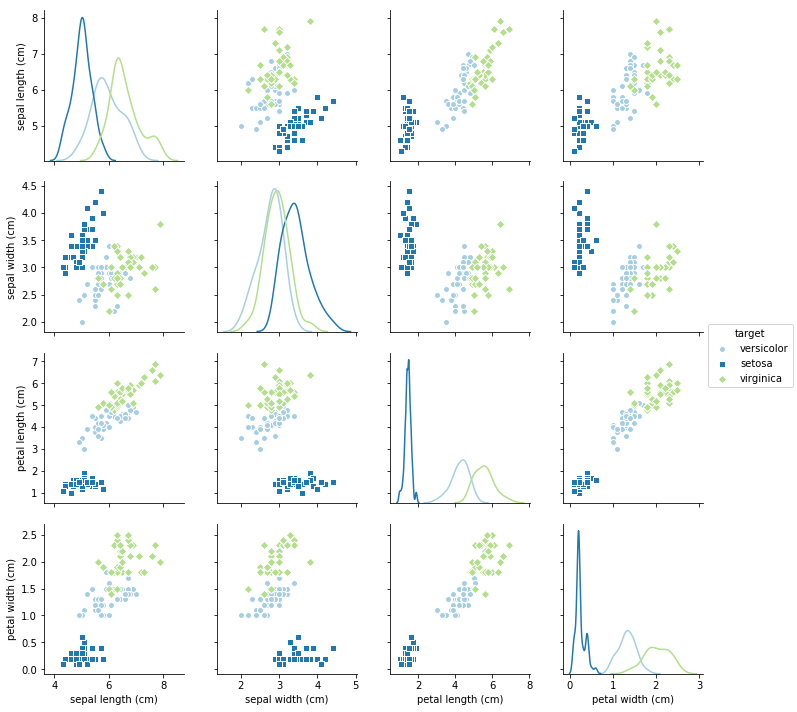

In [11]:
sns.pairplot(iris_train,
             hue = 'target',
             markers=["o", "s", "D"],
             palette ='Paired',
             diag_kind="kde" )

Text(0.5,0.98,'Distribution of Petal Length')

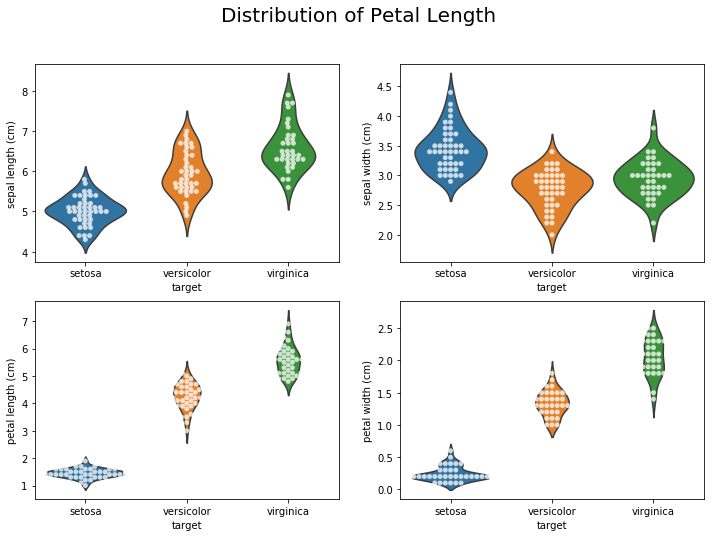

In [12]:
fig, axes = plt.subplots (2,2,figsize = (12,8))
axes = axes.flatten()

for t in range(0,4):
    sns.swarmplot(x = ir[4],
                      y = iris_train[ir[t]],
                      data = iris,
                     alpha = .75,
                     color = 'white',
                     ax = axes[t])
    sns.violinplot(x = ir[4],
                      y = iris_train[ir[t]],
                      data = iris,
                      inner = None,
                      ax = axes[t])
fig.suptitle ("Distribution of Petal Length", fontsize = 20)

It's clear to see why EDA can be so helpful. From just a few plots we can generally start to see trends within our data. Combining the violin and boxplot lets us view the distribution as well as size of our species more easily.

Here we can start to see which are our most distinguising features and more about their distribution. Petal Length and Width at first glance seem to be some the most distinguising features.

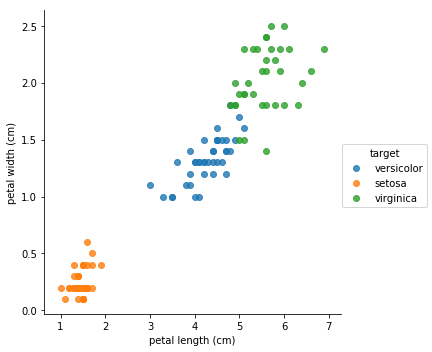

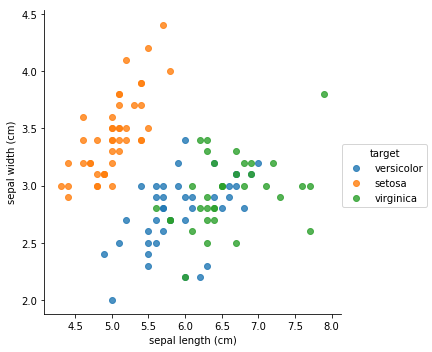

In [13]:
sns.lmplot(x = 'petal length (cm)',
           y = 'petal width (cm)',
           data = iris_train,
          hue =  'target',
          fit_reg = False)
sns.lmplot(x = 'sepal length (cm)',
           y = 'sepal width (cm)',
           data = iris_train,
          hue =  'target',
          fit_reg = False)

## 3. Data Transformation and Engineering

One way of extracting additional information from data is to create new features. Many times when the data is large we will need to worry about the size of our data (where PCA can help), however with only 150 rows of total data and 4 features we should encounter no issues.

In [15]:
def create_feature(x):
    sepal_ratio = x['sepal length (cm)'] / x['sepal width (cm)']
    petal_ratio = x['petal length (cm)'] / x['petal width (cm)']
    sepal_petal_w = x['sepal width (cm)'] / x['petal width (cm)']
    sepal_petal_l = x['sepal length (cm)'] / x['petal length (cm)']
    new_table = pd.concat([sepal_ratio, petal_ratio, sepal_petal_w,sepal_petal_l], axis = 1)
    new_table = new_table.rename(columns = {0: "Sepal Ratio", 1: "Petal Ratio", 2: "S/P_W", 3:"S/P_L"})
    return new_table
new_table = pd.concat([iris_train,create_feature(iris_train)], axis = 1)
#pd.concat([iris_train,new_table], axis = 1)

In [41]:
from sklearn.preprocessing import StandardScaler

In [49]:
s_table = new_table.drop(['target'], axis = 1)

In [52]:
scaler = StandardScaler()
scaled_table = scaler.fit_transform(s_table)
scaled_features_df = pd.DataFrame(scaled_table, index=s_table.index, columns=s_table.columns)
scaled_features_df['target'] = iris_train['target']

In [56]:
scaled_features_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Sepal Ratio,Petal Ratio,S/P_W,S/P_L,target
88,-0.242164,-0.160760,0.274753,0.215692,-0.161017,-0.494999,-0.592403,-0.676984,versicolor
2,-1.364639,0.298555,-1.308731,-1.229552,-1.131836,0.696540,1.015670,1.381842,setosa
126,0.506153,-0.620076,0.670625,0.872621,0.687089,-0.668479,-0.680736,-0.744882,virginica
116,0.880311,-0.160760,1.066496,0.872621,0.570910,-0.529999,-0.667687,-0.845418,virginica
128,0.755592,-0.620076,1.123049,1.266778,0.861357,-0.668479,-0.706835,-0.881076,virginica


# 4. Algorithms
    a. Baseline 
    b. SVM 
    c. Logistic
    d. Gradient Descent 
    e. Decision Tree

It is always a good idea to have a "Baseline" predicition for our Algorithms. Part of what makes a basline so great is that is gives you easy and quantittative means of comparing your different models. For this we are going to pretend we are a mediocre biologist and were asked to predict flowers. However, we only know the "Setosa" flower and thus assume that if we guess everything is "Setosa" that we will guess high enough for our boss not to notice.

Becasue this is a small dataset I will take 25% as our validation data for our algorithms. 

In addition, for this problem we will be focusing on optimizing the "accuracy" of our model. All we care about is how many we guess right. 

In [58]:
df = scaled_features_df

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

X = df.drop(['target'], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Baseline

In [145]:
Predict_Correct = []
Predict_Wrong = []

for item in y_test:
    if item == "setosa":
        Predict_Correct.append(item)
    else:
        Predict_Wrong.append(item)

In [148]:
len(Predict_Correct) / (len(Predict_Correct) + len(Predict_Wrong))

0.3333333333333333

This amateur biologist is guessing very poorly. They are getting only 33% correct (This is a classic dataset and happens to have equal distributions of each flower). However, we can use this to compare our upcoming models.

## SVM (Support Vector Machine)

In [120]:
from sklearn.svm import SVC, LinearSVC

In [139]:
def svc(x_train,x_test,y_train,y_test):
    svc = SVC()
    svc.fit(x_train,y_train)
    preds = svc.predict(x_test)
    print(classification_report(y_test,preds))
    print("Our Accuracy score for the Logistic Model is:  " + str(round(accuracy_score(y_test,preds),2)))
    print("Cross Validation Accuracy:   " + str(cross_val_score(svc, X_train,y_train,cv = 3, scoring = "accuracy")))
svc(X_train,X_test,y_train,y_test)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.93      0.96        14
  virginica       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

Our Accuracy score for the Logistic Model is:  0.97
Cross Validation Accuracy:   [0.90322581 0.96666667 0.93103448]


In [140]:
def Linsvc(x_train,x_test,y_train,y_test):
    svc = LinearSVC()
    svc.fit(x_train,y_train)
    preds = svc.predict(x_test)
    print(classification_report(y_test,preds))
    print("Our Accuracy score for the Logistic Model is:  " + str(round(accuracy_score(y_test,preds),2)))
    print("Cross Validation Accuracy:   " + str(cross_val_score(svc, X_train,y_train,cv = 3, scoring = "accuracy")))
Linsvc(X_train,X_test,y_train,y_test)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.93      0.96        14
  virginica       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

Our Accuracy score for the Logistic Model is:  0.97
Cross Validation Accuracy:   [0.93548387 0.96666667 0.93103448]


## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [129]:
def LogReg(x_train,x_test,y_train,y_test):
    logit = LogisticRegression()
    logit.fit(x_train,y_train)
    preds = logit.predict(x_test)
    print(classification_report(y_test,preds))
    print("Our Accuracy score for the Logistic Model is:  " + str(round(accuracy_score(y_test,preds),2)))
LogReg(X_train,X_test,y_train,y_test)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.71      0.83        14
  virginica       0.60      1.00      0.75         6

avg / total       0.92      0.87      0.87        30

Our Accuracy score for the Logistic Model is:  0.87


Not bad! Interestingly we were able to predict setosa perfectly. However, much of this suffers from small sample size. In addition, we may have wanted to run this with a stratified sampling as we only have 6 "Virginica" samples and 14 "Versicolor". It seems Softmax ("Multinomial") regression did not produce any stark benefits on our small datasize. Further parameter optimization may be able to squeeze out a little more Accuracy.

In [128]:
def Soft_Max_Reg(x_train,x_test,y_train,y_test):
    softmax = LogisticRegression(multi_class="multinomial", solver = "lbfgs")
    softmax.fit(x_train,y_train)
    preds = softmax.predict(x_test)
    print(classification_report(y_test,preds))
    print("Our Accuracy score for the Logistic Model is:  " + str(round(accuracy_score(y_test,preds),2)))
Soft_Max_Reg(X_train,X_test,y_train,y_test)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.93      0.96        14
  virginica       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

Our Accuracy score for the Logistic Model is:  0.97
